# 数据分析常用图表的绘制

In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

## 1. [Subplots](https://matplotlib.org/api/pyplot_api.html?highlight=matplotlib%20pyplot%20subplots#matplotlib.pyplot.subplots)

<IPython.core.display.Javascript object>


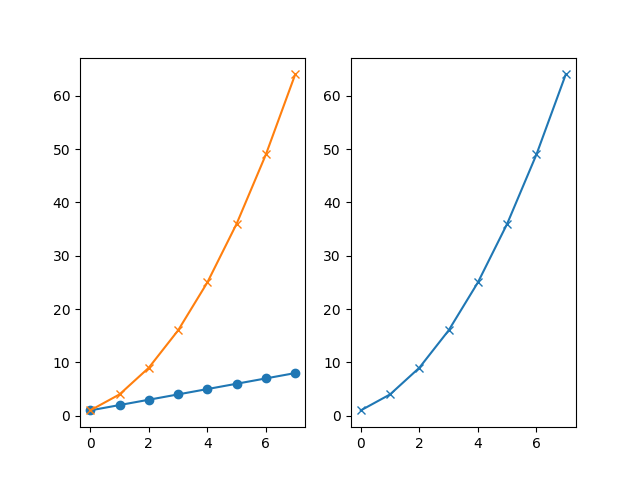

In [2]:
plt.figure()
# 表示1行2列，现在在第一个子图上进行操作
plt.subplot(1, 2, 1)

linear_data = np.arange(1, 9)
plt.plot(linear_data, '-o')

In [3]:
exponential_data = linear_data ** 2
plt.subplot(1, 2, 2)
plt.plot(exponential_data, '-x')

In [4]:
plt.subplot(1, 2, 1)
plt.plot(exponential_data, '-x')

<IPython.core.display.Javascript object>


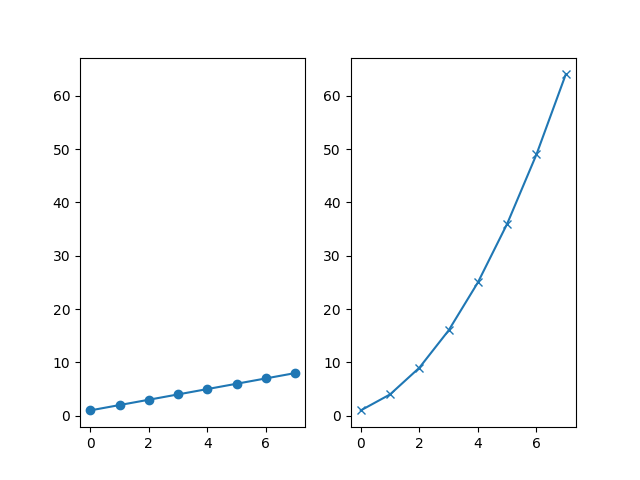

In [5]:
# 保证子图中坐标范围一致
plt.figure()
ax1 = plt.subplot(1, 2, 1)
plt.plot(linear_data, '-o')
ax2 = plt.subplot(1, 2, 2, sharey=ax1)
plt.plot(exponential_data, '-x')

<IPython.core.display.Javascript object>


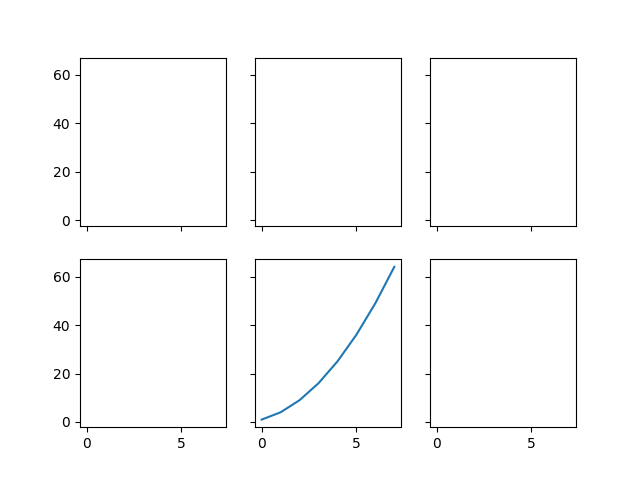

In [6]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3,
                                                      sharex=True, sharey=True)
ax5.plot(exponential_data, '-')

## 2. [直方图](https://matplotlib.org/api/pyplot_api.html?highlight=matplotlib%20pyplot%20hist#matplotlib.pyplot.hist)

<IPython.core.display.Javascript object>


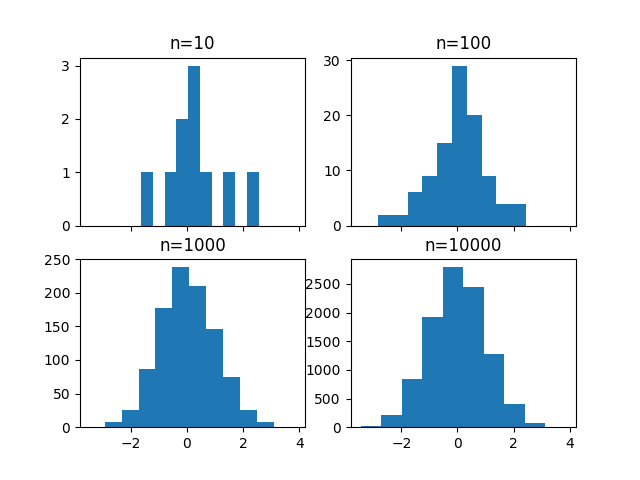

In [7]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1, ax2, ax3, ax4]

for n in range(len(axs)):
    sample_size = 10 ** (n + 1)
    sample = np.random.normal(loc=0., scale=1., size=sample_size)
    # 默认bin的个数为10
    axs[n].hist(sample)
    axs[n].set_title('n={}'.format(sample_size))

<IPython.core.display.Javascript object>


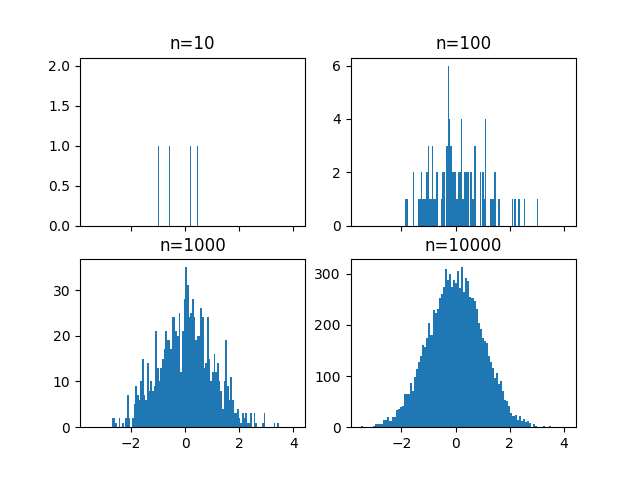

In [8]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1, ax2, ax3, ax4]

for n in range(len(axs)):
    sample_size = 10 ** (n + 1)
    sample = np.random.normal(loc=0., scale=1., size=sample_size)
    # bin设为100
    axs[n].hist(sample, bins=100)
    axs[n].set_title('n={}'.format(sample_size))

<IPython.core.display.Javascript object>


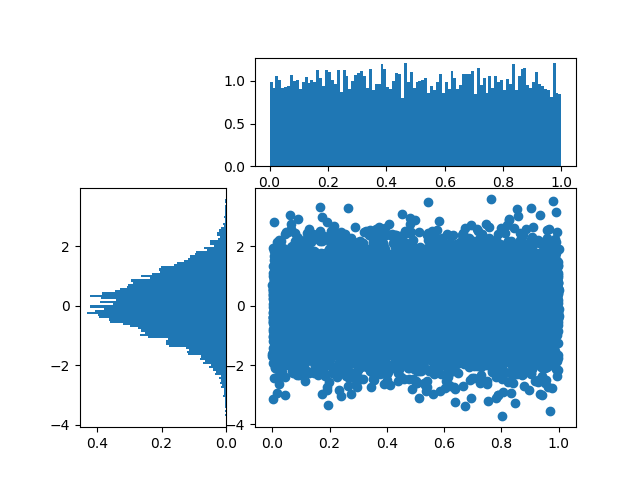

In [9]:
# 使用gridspec和直方图绘制一个复杂分析图
import matplotlib.gridspec as gridspec

x = np.random.random(size=10000)
y = np.random.normal(loc=0., scale=1., size=10000)

plt.figure()
gspec = gridspec.GridSpec(3, 3)

top_hist = plt.subplot(gspec[0, 1:])
side_hist = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

lower_right.scatter(x, y)
top_hist.hist(x, bins=100, normed=True)
side_hist.hist(y, bins=100, orientation='horizontal', normed=True)
side_hist.invert_xaxis()

## 3. [盒形图](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.boxplot.html)

In [10]:
import pandas as pd
# 正态分布采样
normal_sample = np.random.normal(loc=0., scale=1., size=10000)
# 随机数采样
random_sample = np.random.random(size=10000)
# gamma分布采样
gamma_sample = np.random.gamma(2, size=10000)

df = pd.DataFrame({'normal': normal_sample,
                  'random': random_sample,
                  'gamma': gamma_sample})

In [13]:
df.describe()

,gamma,normal,random
count,10000.000000,10000.000000,10000.000000
mean,1.993597,-0.006108,0.501708
std,1.403842,1.004046,0.288762
min,0.018390,-4.457842,0.000037
25%,0.965575,-0.675377,0.252271
50%,1.674998,-0.004627,0.501008
75%,2.678433,0.664586,0.753900
max,11.098576,4.131276,0.999846


<IPython.core.display.Javascript object>


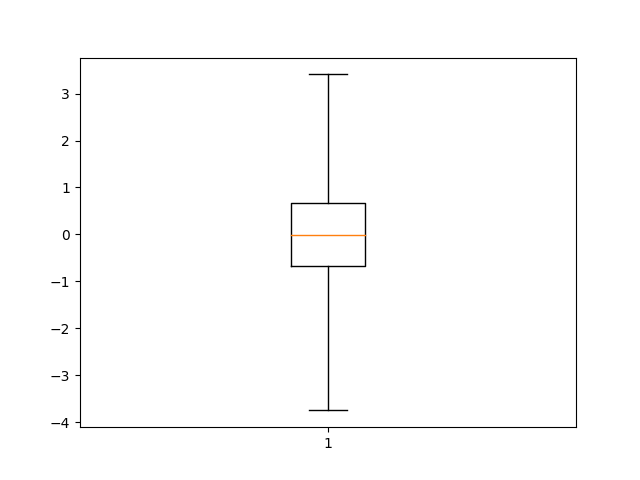

{'boxes': [<matplotlib.lines.Line2D at 0xcda87b8>],
 'caps': [<matplotlib.lines.Line2D at 0xcdb0b70>,
 'fliers': [<matplotlib.lines.Line2D at 0xcdbcac8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xcdb7be0>],
 'whiskers': [<matplotlib.lines.Line2D at 0xcda8a20>,
  <matplotlib.lines.Line2D at 0xcdb09e8>]}

In [11]:
plt.figure()
plt.boxplot(df['normal'], whis='range')

<IPython.core.display.Javascript object>


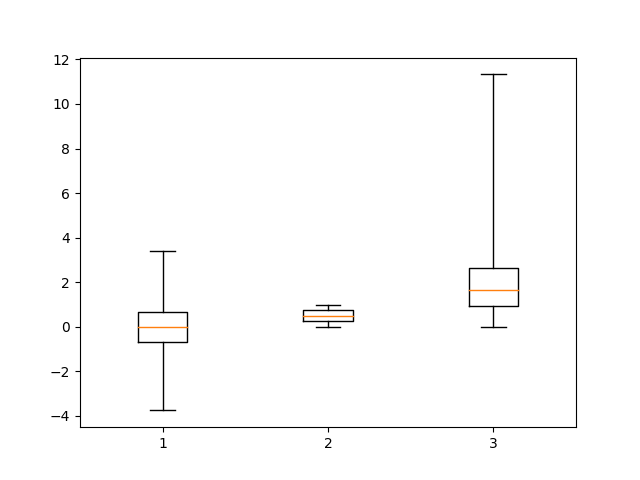

{'boxes': [<matplotlib.lines.Line2D at 0xa89e550>,
 'caps': [<matplotlib.lines.Line2D at 0xd0419b0>,
 'fliers': [<matplotlib.lines.Line2D at 0xd048ba8>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xd048390>,
 'whiskers': [<matplotlib.lines.Line2D at 0xcd69080>,
  <matplotlib.lines.Line2D at 0xd065d68>]}

In [12]:
plt.figure()
plt.boxplot([df['normal'], df['random'], df['gamma']], whis='range')

<IPython.core.display.Javascript object>


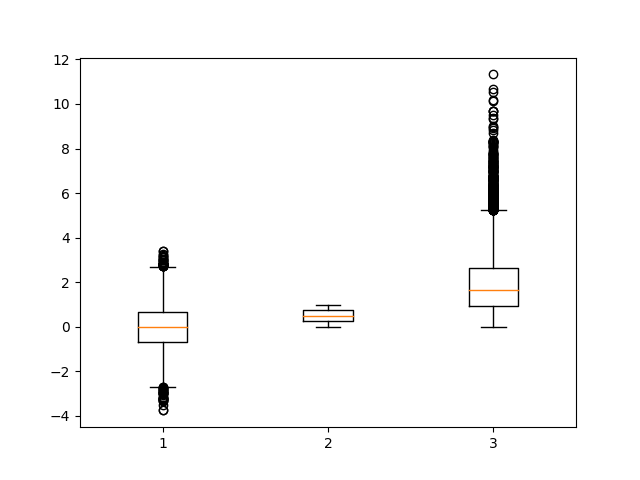

{'boxes': [<matplotlib.lines.Line2D at 0xd7bdf28>,
 'caps': [<matplotlib.lines.Line2D at 0xd7ce9e8>,
 'fliers': [<matplotlib.lines.Line2D at 0xd7d6be0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xd7d63c8>,
 'whiskers': [<matplotlib.lines.Line2D at 0xd7ca978>,
  <matplotlib.lines.Line2D at 0xd7f1da0>]}

In [13]:
plt.figure()
plt.boxplot([df['normal'], df['random'], df['gamma']])

## 4. [热图](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.hist2d.html?highlight=matplotlib%20axes%20axes%20hist2d#matplotlib.axes.Axes.hist2d)

<IPython.core.display.Javascript object>


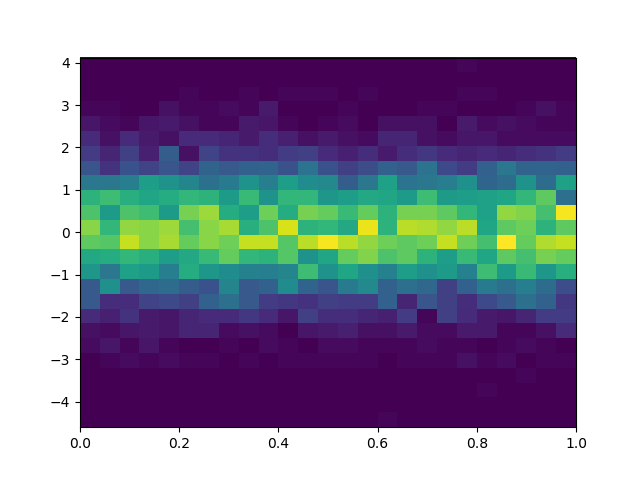

(array([[  0.,   0.,   0.,   0.,   0.,   2.,   3.,   8.,  19.,  19.,  36.,
          41.,  51.,  56.,  49.,  44.,  27.,  18.,  12.,   8.,   4.,   1.,
           0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   1.,   4.,   2.,   6.,   9.,  34.,  27.,
          42.,  50.,  45.,  37.,  47.,  27.,  10.,   7.,   3.,   2.,   1.,
           0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   2.,   1.,   4.,  10.,   9.,  19.,  39.,
          45.,  62.,  57.,  49.,  43.,  29.,  17.,  13.,   8.,   1.,   0.,
           0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   1.,   4.,   5.,   5.,  14.,  23.,  37.,
          43.,  56.,  56.,  47.,  40.,  38.,  14.,   6.,   5.,   4.,   0.,
           0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   2.,   1.,   4.,   4.,  15.,  24.,  29.,
          38.,  59.,  58.,  37.,  42.,  35.,  18.,  20.,   3.,   5.,   3.,
           0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   1.,   0.,   7.,   7.,  13.,  20.,  42.,
          41.,  52.,  48.,  54.,  4

In [14]:
plt.figure()
y = np.random.normal(loc=0., scale=1., size=10000)
x = np.random.random(size=10000)
plt.hist2d(x, y, bins=25)

<IPython.core.display.Javascript object>


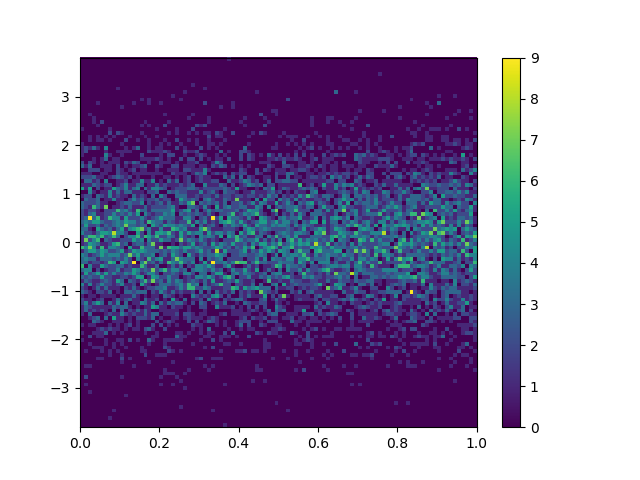

(array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]]),
 array([  3.47886312e-04,   1.03443327e-02,   2.03407791e-02,
          3.03372255e-02,   4.03336719e-02,   5.03301183e-02,
          6.03265647e-02,   7.03230111e-02,   8.03194575e-02,
          9.03159039e-02,   1.00312350e-01,   1.10308797e-01,
          1.20305243e-01,   1.30301689e-01,   1.40298136e-01,
          1.50294582e-01,   1.60291029e-01,   1.70287475e-01,
          1.80283921e-01,   1.90280368e-01,   2.00276814e-01,
          2.10273261e-01,   2.20269707e-01,   2.30266153e-01,
          2.40262600e-01,   2.50259046e-01,   2.60255493e-01,
          2.70251939e-01,   2.80248385e-01,   2.90244832e-01,
          3.00241278e-01,   3.10237725e-01,   3.20234171e-01,
          3.30230617e-01,   3.40

In [15]:
plt.figure()
y = np.random.normal(loc=0., scale=1., size=10000)
x = np.random.random(size=10000)
plt.hist2d(x, y, bins=100)

In [16]:
plt.colorbar()